#**Lectura de paquetes y datos**

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# instalar el paquete prince
# ==============================================================================
!pip install factor_analyzer

# Gráficos
# ==============================================================================

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import FactorAnalysis

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 40 kB 3.3 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40395 sha256=578621a9587ac2b14ac1be92a2ec75555faa0d89ada22ed4e9d705a9e12c00ae
  Stored in directory: /root/.cache/pip/wheels/8d/9e/4c/fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer


#**Modelo factorial**

A partir de variables observadas se definen factores comunes o variables latentes no observados que las explican. El análisis factorial puede ser **exploratorio** o **confirmatorio**. 

En el **análisis factorial exploratorio**  no se conoce a priori el número de factores y es en la aplicación empírica donde se determina este número. 

En el **análisis factorial confirmatorio** los factores están fijados a priori, utilizando herramientas inferenciales para su aceptación o rechazo.


Dado un vector de datos $\bf{x}_{(p,1)}$ de $p$ variables observadas de una población, el modelo establece que ese vector de datos observados se puede expresar como:
${\bf{x}} = \mu  + \Lambda {\bf{f}} + {\bf{u}}$

donde:

$\mu $ Vector de medias

$\Lambda_{(pxm)}$ Coeficientes de carga

$\bf{f}_{(mx1)}$ Variables latentes o factores no observados 

$\bf{f}\sim {N_m}({\bf{0}},{\bf{I}})$

$\bf{u}_{(px1)}$ Perturbaciones no observadas o factor específico 

$\bf{u}\sim {N_p}({\bf{0}},\Psi )$
$\bf{x}\sim {N_p}({\bf{\mu}},\bf{V} )$

**Propiedades**

$Cov (\bf{u,f})=0$

$Cov (\bf{x,f})=\Lambda$

El modelo factorial permite expresar las $p$ variables del modelo como una combinación lineal de $q$ factores ( o variables latentes) no observables (donde $q < p$).\\
Un modelo con 2 factores y 4 variables observadas es: 

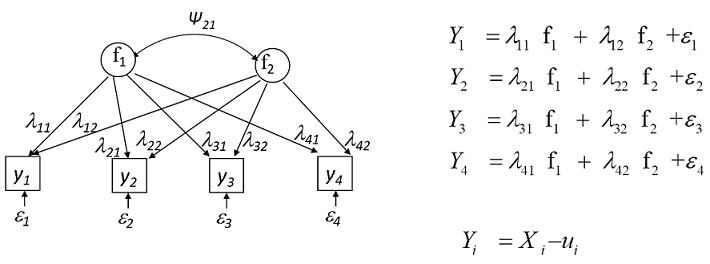

**Estructura de la varianza**
La matriz de varianzas y covarianzas de los datos 


$\bf{V}= \bf{\Lambda\Lambda^{t} +\psi}$

La varianza de cada variable  $x_i$ es igual a:

$\sigma _i^2 = \sum\limits_{j = i}^m {\lambda _{ij}^2}  + \psi _i^2 \qquad i = 1,2,...p$

$\sigma _i^2 = h_i^2 + \psi _i^2$

$h_i^2$ Variabilidad común (comunalidad)

$ \psi _i^2 $ Variabilidad especifica


La covarianza entre  $x_i$  y  $x_k$ $\qquad \qquad \sigma _{ik}^2 = \sum\limits_{j = 1}^m {{\lambda _{ij}}} {\lambda _{kj}}$


#**Un ejemplo**
Evaluación de la Personalidad de Apertura Sintética es un proyecto de evaluación de la personalidad basado en la web. 

La base  (bfi.cvs) contiene 25 indicadores la percepción propia de la  personalidad tomados por la International Personality Item Pool (ipip.ori.org)

A continuación se enumeran las preguntas cuyas respuestas corresponden a la escala: (1) Muy incorrecto, (2) Moderadamente incorrecto (3) NI incorrecto ni correcto, (4) Moderadamente correcto y (5) Muy correcto.

A1	Soy indiferente a los sentimientos de los demás.

A2	Me intereso or el bienestar de los demas

A3	Se como consolar a los demás

A4	Amo a mis hijos

A5	Hace que la gente se sienta a gusto


C1	Soy exigente en mi trabajo

C2	Sigo hasta que todo está perfecto

C3	Hago las cosas  siguiendo un plan

C4	Dejo las cosas a medio hacer

C5	Desperdicio mi tiempo


E1	No  hablo mucho

E2	Me resulta dificil acercarme a los demas

E3	Se como cautivar a la gente

E4	Hago amigos con facilidad

E5	Me hago cargo


N1	Me enojo facilmente

N2	Me irriito facilmente

N3	Cambio de humor frecuentemente

N4	A menudo me siento deprimido

N5	Entro en panico facilmente


O1	Estoy lleno de ideas

O2	Evito  imponer mi voluntad a los demás.

O3	Llevo la conversación a un nivel superior

O4	Dedico tiempo a reflexionar sobre las cosas

O5	No profundiza sobre los temas



In [2]:
# Base de datos 
# ==============================================================================

url = 'https://drive.google.com/file/d/1OiB897k4IHUmufDLvs1Mv2BLGkxZcyXX/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2800 non-null   int64  
 1   A1          2784 non-null   float64
 2   A2          2773 non-null   float64
 3   A3          2774 non-null   float64
 4   A4          2781 non-null   float64
 5   A5          2784 non-null   float64
 6   C1          2779 non-null   float64
 7   C2          2776 non-null   float64
 8   C3          2780 non-null   float64
 9   C4          2774 non-null   float64
 10  C5          2784 non-null   float64
 11  E1          2777 non-null   float64
 12  E2          2784 non-null   float64
 13  E3          2775 non-null   float64
 14  E4          2791 non-null   float64
 15  E5          2779 non-null   float64
 16  N1          2778 non-null   float64
 17  N2          2779 non-null   float64
 18  N3          2789 non-null   float64
 19  N4          2764 non-null  

In [3]:
data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [4]:
data.describe()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
count,2800.000000,2784.000000,2773.00000,2774.000000,2781.000000,2784.000000,2779.000000,2776.000000,2780.000000,2774.000000,2784.000000,2777.000000,2784.000000,2775.000000,2791.000000,2779.000000,2778.000000,2779.000000,2789.000000,2764.000000,2771.000000,2778.000000,2800.000000,2772.000000,2786.000000,2780.000000,2800.000000,2577.000000,2800.000000
mean,64599.238214,2.413434,4.80238,4.603821,4.699748,4.560345,4.502339,4.369957,4.303957,2.553353,3.296695,2.974433,3.141882,4.000721,4.422429,4.416337,2.929086,3.507737,3.216565,3.185601,2.969686,4.816055,2.713214,4.438312,4.892319,2.489568,1.671786,3.190144,28.782143
std,1728.527002,1.407737,1.17202,1.301834,1.479633,1.258512,1.241347,1.318347,1.288552,1.375118,1.628542,1.631505,1.605210,1.352719,1.457517,1.334768,1.570917,1.525944,1.602902,1.569685,1.618647,1.129530,1.565152,1.220901,1.221250,1.327959,0.469647,1.107714,11.127555
min,61617.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,63080.000000,1.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,1.000000,4.000000,4.000000,1.000000,1.000000,3.000000,20.000000
50%,64575.000000,2.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,5.000000,3.000000,4.000000,3.000000,3.000000,3.000000,5.000000,2.000000,5.000000,5.000000,2.000000,2.000000,3.000000,26.000000
75%,66092.250000,3.000000,6.00000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,6.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,6.000000,4.000000,5.000000,6.000000,3.000000,2.000000,4.000000,35.000000
max,67560.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,5.000000,86.000000


In [5]:
print('------------------------------------------')
print('Seleccionamos las variables para  trabajar')
print('------------------------------------------')

X=  data.iloc[:, 1:26]
# guardamos sus nombres en un  objeto
names_var =data.columns[1:26] 
X.describe()

------------------------------------------
Seleccionamos las variables para  trabajar
------------------------------------------


,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
count,2784.000000,2773.00000,2774.000000,2781.000000,2784.000000,2779.000000,2776.000000,2780.000000,2774.000000,2784.000000,2777.000000,2784.000000,2775.000000,2791.000000,2779.000000,2778.000000,2779.000000,2789.000000,2764.000000,2771.000000,2778.000000,2800.000000,2772.000000,2786.000000,2780.000000
mean,2.413434,4.80238,4.603821,4.699748,4.560345,4.502339,4.369957,4.303957,2.553353,3.296695,2.974433,3.141882,4.000721,4.422429,4.416337,2.929086,3.507737,3.216565,3.185601,2.969686,4.816055,2.713214,4.438312,4.892319,2.489568
std,1.407737,1.17202,1.301834,1.479633,1.258512,1.241347,1.318347,1.288552,1.375118,1.628542,1.631505,1.605210,1.352719,1.457517,1.334768,1.570917,1.525944,1.602902,1.569685,1.618647,1.129530,1.565152,1.220901,1.221250,1.327959
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,1.000000,4.000000,4.000000,1.000000
50%,2.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,5.000000,3.000000,4.000000,3.000000,3.000000,3.000000,5.000000,2.000000,5.000000,5.000000,2.000000
75%,3.000000,6.00000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,6.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,6.000000,4.000000,5.000000,6.000000,3.000000
max,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [6]:
print('-------------------------------------------')
print('Identificamos la cantidad de datos perdidos')
print('-------------------------------------------')

X_check=X.isna()

print(X_check)

total_nan_values = X.isnull().sum().sum()
print ("Cantidad de NaN:"+str(total_nan_values))

-------------------------------------------
Identificamos la cantidad de datos perdidos
-------------------------------------------
         A1     A2     A3     A4     A5  ...     O1     O2     O3     O4     O5
0     False  False  False  False  False  ...  False  False  False  False  False
1     False  False  False  False  False  ...  False  False  False  False  False
2     False  False  False  False  False  ...  False  False  False  False  False
3     False  False  False  False  False  ...  False  False  False  False  False
4     False  False  False  False  False  ...  False  False  False  False  False
...     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
2795  False  False  False  False  False  ...  False  False  False  False  False
2796  False  False  False  False  False  ...  False  False  False  False  False
2797  False  False  False  False  False  ...  False  False  False  False  False
2798  False  False  False  False  False  ...  False  False  False  F

In [7]:
print('------------------------------------------------------')
print('¿Cuantas observaciones perdemos si eliminamos los NaN?')
print('------------------------------------------------------')

X.dropna()
X.dropna().shape

------------------------------------------------------
¿Cuantas observaciones perdemos si eliminamos los NaN?
------------------------------------------------------


(2436, 25)

In [8]:
print('---------------------------')
print('Reemplazamos NaN por ceros')
print('---------------------------')

X1 = X.fillna(0)

X1.head

---------------------------
Reemplazamos NaN por ceros
---------------------------


<bound method NDFrame.head of        A1   A2   A3   A4   A5   C1   C2  ...   N4   N5   O1  O2   O3   O4   O5
0     2.0  4.0  3.0  4.0  4.0  2.0  3.0  ...  2.0  3.0  3.0   6  3.0  4.0  3.0
1     2.0  4.0  5.0  2.0  5.0  5.0  4.0  ...  5.0  5.0  4.0   2  4.0  3.0  3.0
2     5.0  4.0  5.0  4.0  4.0  4.0  5.0  ...  2.0  3.0  4.0   2  5.0  5.0  2.0
3     4.0  4.0  6.0  5.0  5.0  4.0  4.0  ...  4.0  1.0  3.0   3  4.0  3.0  5.0
4     2.0  3.0  3.0  4.0  5.0  4.0  4.0  ...  4.0  3.0  3.0   3  4.0  3.0  3.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ..  ...  ...  ...
2795  6.0  1.0  3.0  3.0  3.0  6.0  6.0  ...  0.0  1.0  6.0   1  6.0  6.0  1.0
2796  2.0  4.0  4.0  3.0  5.0  2.0  3.0  ...  3.0  3.0  6.0   3  5.0  4.0  2.0
2797  2.0  3.0  5.0  2.0  5.0  5.0  5.0  ...  3.0  1.0  5.0   1  6.0  4.0  3.0
2798  5.0  2.0  2.0  4.0  4.0  5.0  5.0  ...  4.0  1.0  5.0   2  5.0  5.0  1.0
2799  2.0  3.0  1.0  4.0  2.0  5.0  5.0  ...  1.0  1.0  3.0   1  3.0  5.0  1.0

[2800 rows x 25 colum

In [9]:
print('--------------------------------------------------------')
print('Analisis de la estructura de correlación entre variables')
print('--------------------------------------------------------')
corrX1 = X1.corr(method='pearson')
corrX1.shape

--------------------------------------------------------
Analisis de la estructura de correlación entre variables
--------------------------------------------------------


(25, 25)

Text(0.5, 1.0, 'Matriz de correlación')

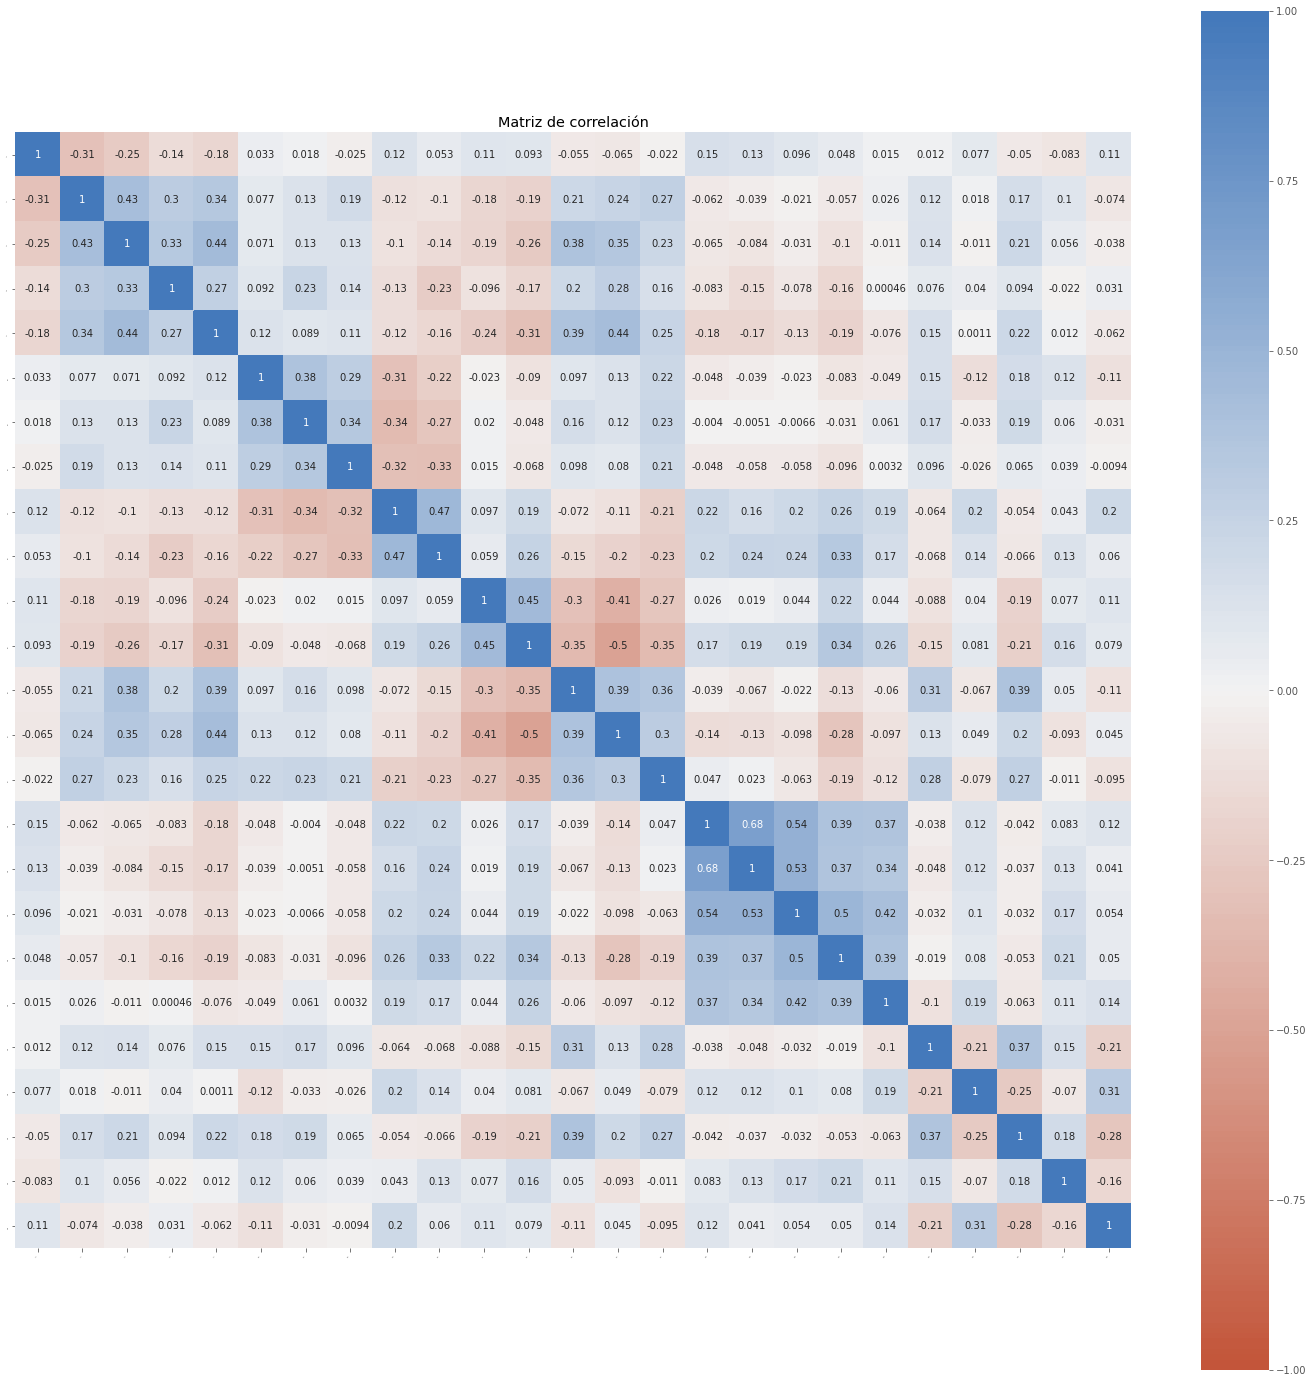

In [10]:
# Heatmap matriz de correlaciones. Usando paquete matplotlib.pyplot
# ==================================================================

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 25))

sns.heatmap(corrX1,
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 250, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 2)
plt.title('Matriz de correlación')


##**Algunos análisis previos**

**Test de esfericidad de Barlett**

Este test tiene como hipotesis nula (H0) que la matriz de correlación es una matriz identidad (es una matriz diagonal donde la diagonal son todos 1)

Para discutir:

¿que representa la hipotesis nula?

¿que concluye si se rechaza la prueba?

¿que concluye si No se rechaza la prueba?

In [11]:


from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo


chi2,p = calculate_bartlett_sphericity(X1)
print("Test de esfericidad de Bartlett")
print("estadistico Chi squared: ",chi2)
print("valor p:",p)


Test de esfericidad de Bartlett
estadistico Chi squared:  18203.919833731066
valor p: 0.0


**Medida KAISER-MEYER-OLKIN (KMO)**

La prueba KMO esa una medida de adecuación  de la muestra al análisis factorial.

Es un cociente entre la suma para todos los pares posibles de variables de las corrrelaciones entre las variables elevadas al cuadrado sobre la suma para todos los pares posibles de variables de las correlaciones entre variables al cuadrado más las correlaciones parciales al cuadrado.
Un coeficiente de correlación parcial mide la correlación entre dos variables, una vez que se han descontado los efectos lineales de las otras.

La puntuación KMO está siempre entre 0 y 1 y se considera que los datos son adecuados para el modelo cuando supera a 0,6. Este indicador se interpreta (Kaiser, 1974; Kaiser y Rice, 1974) como:

$\geq 0,9$     maravilloso

$[0,8; 0,9)$   meritorio

$[0,7; 0,8)$   regular

$[0,6; 0,7)$   mediocre

$[0,5; 0,6)$   miserable

$< 0,5$        inaceptable

Esta medida se puede calcular para cada variable, en ese caso para una variables  ${x}_j$ indica si ésta es adecuada para el tratamiento en el análisis factorial con el resto de las variables

In [12]:
kmo_all,kmo_model = calculate_kmo(X1)
print("KMO Test",kmo_model)

KMO Test 0.8370061940372951


#**Estimamos el modelo con FactorAnalyzer**

Hacemos una primera estimación para determinar el número de factores con el que vamos a definir el modelo

In [13]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=X1.shape[1],rotation = None,impute = "drop",method='minres',is_corr_matrix=False)
fa.fit(X1)

#Pemite la imputación de datos perdidos, impute : {'drop', 'mean', 'median'}, optional/ drop por defecto
# Metodos de ajuste que se pueden elegir: MINRES or Maximum Likelihood. Defaults to 'minres'.
  ## Al final de este colab hay una descrición de algunos métodos de estimación.

#rotation: Methods include: (a) varimax (orthogonal rotation) (b) promax (oblique rotation) (c) oblimin (oblique rotation) (d) oblimax (orthogonal rotation) (e) quartimin (oblique rotation) (f) quartimax (orthogonal rotation) (g) equamax (orthogonal rotation)    Defaults to 'promax'.
          #'promax' poir defecto.


FactorAnalyzer(bounds=(0.005, 1), impute='drop', is_corr_matrix=False,
               method='minres', n_factors=25, rotation=None, rotation_kwargs={},
               use_smc=True)

##**Determinar del número de factores**

Número máximo de factores: Los que cumplan la desigualdad $p (p+1)/2\geq p (m +1)$


In [14]:
print('----------------------------------------------------------')
print ('Elegir la cantidad de factores mirando los valores propios')
print('----------------------------------------------------------')
ev, v = fa.get_eigenvalues()
pd.DataFrame(ev)
    


----------------------------------------------------------
Elegir la cantidad de factores mirando los valores propios
----------------------------------------------------------


,0
0,4.773725
1,2.707210
2,2.036090
3,1.765571
4,1.508625
5,1.128809
6,0.863740
7,0.832638
8,0.742596
9,0.733117


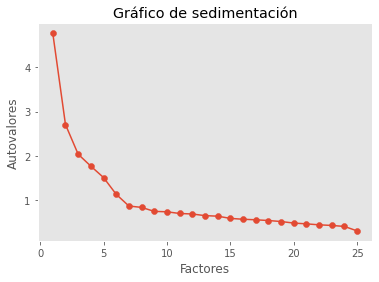

In [15]:
# Create scree plot using matplotlib
plt.scatter(range(1,X1.shape[1]+1),ev)
plt.plot(range(1,X1.shape[1]+1),ev)
plt.title('Gráfico de sedimentación')
plt.xlabel('Factores')
plt.ylabel('Autovalores')
plt.grid()
plt.show()  

Si la unicidad es alta ( significa que esa variable no está explicada por los constructos) Son considerados altos los valores mayores a 0,6.
Identificar las variables con valoes mayores a 0,6.

In [16]:
pd.DataFrame((fa.get_communalities(),fa.get_uniquenesses()),index=['Comunalidad','Unicidad'],columns=names_var)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
Comunalidad,0.376467,0.578778,0.543438,0.418621,0.525401,0.459967,0.584737,0.415718,0.627513,0.592776,0.557325,0.639485,0.575224,0.645122,0.510092,0.756079,0.731962,0.629791,0.592348,0.5123,0.413692,0.415953,0.540752,0.350188,0.409813
Unicidad,0.623533,0.421222,0.456562,0.581379,0.474599,0.540033,0.415263,0.584282,0.372487,0.407224,0.442675,0.360515,0.424776,0.354878,0.489908,0.243921,0.268038,0.370209,0.407652,0.4877,0.586308,0.584047,0.459248,0.649812,0.590187


##**Estimamos el modelo con el numero de factores elegidos**

Definimos el modelo con 5 factores

In [17]:
fa5 = FactorAnalyzer(rotation = None,impute = "drop",is_corr_matrix=False,n_factors=5)
fa5.fit(X1)

FactorAnalyzer(bounds=(0.005, 1), impute='drop', is_corr_matrix=False,
               method='minres', n_factors=5, rotation=None, rotation_kwargs={},
               use_smc=True)

In [18]:
print('--------------------------------------------------------------')
print ('Varianza de cada factor/ proporción de la varianza y acumulada')
print('---------------------------------------------------------------')
name_factor=['F1','F2','F3','F4','F5']
pd.DataFrame(fa5.get_factor_variance(),index=['Varianza factor','Proporción varianza', 'Proporción varianza acumulada'] ,columns=name_factor)

--------------------------------------------------------------
Varianza de cada factor/ proporción de la varianza y acumulada
---------------------------------------------------------------


,F1,F2,F3,F4,F5
Varianza factor,4.206453,2.181672,1.411697,1.100786,0.885354
Proporción varianza,0.168258,0.087267,0.056468,0.044031,0.035414
Proporción varianza acumulada,0.168258,0.255525,0.311993,0.356024,0.391439


In [19]:
print('-------------------------------------------')
print ('Matriz de coeficientes o cargas factoriales')
print('--------------------------------------------')
Matriz_cargas=pd.DataFrame(fa5.loadings_, index=X1.columns[0:26] ,columns=name_factor)

Matriz_cargas

-------------------------------------------
Matriz de coeficientes o cargas factoriales
--------------------------------------------


,F1,F2,F3,F4,F5
A1,-0.219140,-0.016007,0.088022,0.016696,-0.339850
A2,0.401949,0.292079,-0.100620,0.099800,0.337756
A3,0.484218,0.311176,-0.199540,0.087691,0.307846
A4,0.382694,0.135648,-0.056669,0.247110,0.188997
A5,0.540200,0.186759,-0.227378,0.043758,0.177415
C1,0.297218,0.129934,0.419392,0.077021,-0.062627
C2,0.306733,0.217378,0.454471,0.234846,0.000679
C3,0.298555,0.101882,0.379552,0.281820,0.033661
C4,-0.445819,0.110049,-0.425818,-0.166428,0.069607
C5,-0.487986,0.135014,-0.287879,-0.264602,0.111658


In [20]:
print('----------------------------')
print ('Comunalidades y unicidades ')
print('----------------------------')
fa5.get_communalities()

----------------------------
Comunalidades y unicidades 
----------------------------


array([0.17180277, 0.38103638, 0.47357331, 0.2648496 , 0.41178615,
       0.29096569, 0.40303572, 0.32413018, 0.42472917, 0.42171572,
       0.338038  , 0.53253314, 0.4161882 , 0.52295126, 0.36482094,
       0.62961233, 0.57355262, 0.52060518, 0.47357911, 0.34889038,
       0.28334587, 0.26658871, 0.43451573, 0.23590227, 0.27721426])

In [21]:
pd.DataFrame((fa5.get_communalities(),fa5.get_uniquenesses()),index=['Comunalidad','Unicidad'],columns=names_var)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
Comunalidad,0.171803,0.381036,0.473573,0.26485,0.411786,0.290966,0.403036,0.32413,0.424729,0.421716,0.338038,0.532533,0.416188,0.522951,0.364821,0.629612,0.573553,0.520605,0.473579,0.34889,0.283346,0.266589,0.434516,0.235902,0.277214
Unicidad,0.828197,0.618964,0.526427,0.73515,0.588214,0.709034,0.596964,0.67587,0.575271,0.578284,0.661962,0.467467,0.583812,0.477049,0.635179,0.370388,0.426447,0.479395,0.526421,0.65111,0.716654,0.733411,0.565484,0.764098,0.722786


##**Rotación de los factores**

La matriz de carga no está identificada ante multiplicaciones por matrices ortogonales (a rotaciones), se pueden encontrar otras soluciones que permitan una mejor interpretación de los factores:

 *  **Método varimax**: rotación ortogonal que minimiza el número de variables que tienen saturaciones altas en cada factor, maximizando la varianza de los coeficientes que definen los efectos de cada factor sobre las variables observadas. Simplifica la interpretación de los factores
 *  **Rotaciones oblicuas**: (Promax ,Oblimax):Rotación oblicua que permite que los factores estén correlacionados. No pueden interpretarse independientemente
 *  **Método quartimax**: rotación que minimiza el número de factores necesarios para explicar cada variable. Simplifica la interpretación de las variables observadasElemento de lista
 *  **Métodoequamax**: rotación que combina el método varimax y el quartimax. Minimiza tanto el número de variables que saturan alto en un factor como el número de factores necesarios para explicar una variable.

In [32]:
print('-----------------------------------------')
print ('Modelo con 5 factores y rotación varimax')
print('------------------------------------------')
fa5v= FactorAnalyzer(rotation = 'varimax' ,impute = "drop",is_corr_matrix=False,n_factors=5)
fa5v.fit(X1)



-----------------------------------------
Modelo con 5 factores y rotación varimax
------------------------------------------


FactorAnalyzer(bounds=(0.005, 1), impute='drop', is_corr_matrix=False,
               method='minres', n_factors=5, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [33]:
print('----------------------------------------------------')
print ('Matriz de coeficientes o cargas factoriales rotadas')
print('-----------------------------------------------------')
Matriz_carga_rot = pd.DataFrame(fa5v.loadings_, columns=name_factor, index=names_var)
Matriz_carga_rot['Mayor carga'] = Matriz_carga_rot.idxmax(axis=1) # agrega una columna identificando la carga factorial más alta
Matriz_carga_rot_ord= Matriz_carga_rot.sort_values('Mayor carga') #ordena la matriz según los factores
Matriz_carga_rot_ord

----------------------------------------------------
Matriz de coeficientes o cargas factoriales rotadas
-----------------------------------------------------


,F1,F2,F3,F4,F5,Mayor carga
A1,0.123385,0.026620,0.022147,-0.388038,-0.069329,F1
O2,0.184051,0.005970,-0.095713,0.088988,-0.464326,F1
N5,0.537281,-0.152719,-0.024745,0.112466,-0.153738,F1
N4,0.574588,-0.335036,-0.163504,0.007674,0.066227,F1
N3,0.714979,-0.060029,-0.068672,-0.032937,-0.002343,F1
N2,0.730295,0.028895,-0.030825,-0.194670,-0.023234,F1
N1,0.761899,0.066312,-0.020718,-0.195802,-0.077185,F1
E2,0.244193,-0.673032,-0.085761,-0.097468,-0.055460,F1
C5,0.298996,-0.171912,-0.547207,-0.048945,0.030539,F1
O5,0.105745,-0.007891,-0.049733,-0.002911,-0.513311,F1


In [34]:
print('--------------------------------------------------------------')
print ('Matriz de coeficientes o cargas factoriales rotadas y no rotadas')
print('----------------------------------------------------------------')
pd.DataFrame(np.concatenate((fa5v.loadings_, fa5.loadings_),1), index=names_var)

--------------------------------------------------------------
Matriz de coeficientes o cargas factoriales rotadas y no rotadas
----------------------------------------------------------------


,0,1,2,3,4,5,6,7,8,9
A1,0.123385,0.026620,0.022147,-0.388038,-0.069329,-0.219140,-0.016007,0.088022,0.016696,-0.339850
A2,0.040666,0.167029,0.135196,0.572967,0.070104,0.401949,0.292079,-0.100620,0.099800,0.337756
A3,0.014071,0.284986,0.096364,0.615390,0.064557,0.484218,0.311176,-0.199540,0.087691,0.307846
A4,-0.058148,0.173434,0.230732,0.412236,-0.090631,0.382694,0.135648,-0.056669,0.247110,0.188997
A5,-0.116033,0.372032,0.079841,0.499002,0.067356,0.540200,0.186759,-0.227378,0.043758,0.177415
C1,0.007580,0.052928,0.500196,0.019898,0.193686,0.297218,0.129934,0.419392,0.077021,-0.062627
C2,0.090970,0.027019,0.608651,0.117437,0.098910,0.306733,0.217378,0.454471,0.234846,0.000679
C3,-0.007964,0.002149,0.553661,0.132240,0.005828,0.298555,0.101882,0.379552,0.281820,0.033661
C4,0.262302,-0.067775,-0.583043,-0.018248,-0.105171,-0.445819,0.110049,-0.425818,-0.166428,0.069607
C5,0.298996,-0.171912,-0.547207,-0.048945,0.030539,-0.487986,0.135014,-0.287879,-0.264602,0.111658


In [35]:
print('-----------------------------')
print ('Matriz de rotación utilizada')
print('------------------------------')

# esta matriz es la que permite hacer la rotación de los coeficientes, en este caso la rotación varimax
fa5v.rotation_matrix_


-----------------------------
Matriz de rotación utilizada
------------------------------


array([[ 0.58630414,  0.47393908,  0.42401152,  0.25334817, -0.43319527],
       [-0.29727653,  0.87010879, -0.1198347 , -0.21456648,  0.30681956],
       [-0.46555639, -0.05514875,  0.74796937,  0.38622858,  0.26755405],
       [ 0.02323854,  0.09449208, -0.47988245,  0.85601973,  0.16575362],
       [ 0.59210754, -0.07951298,  0.1269194 , -0.08850777,  0.78685716]])

------------------------------------------------------------------------------
Gráfico para visualizar las cargas factoriales más importantes en cada factor
------------------------------------------------------------------------------


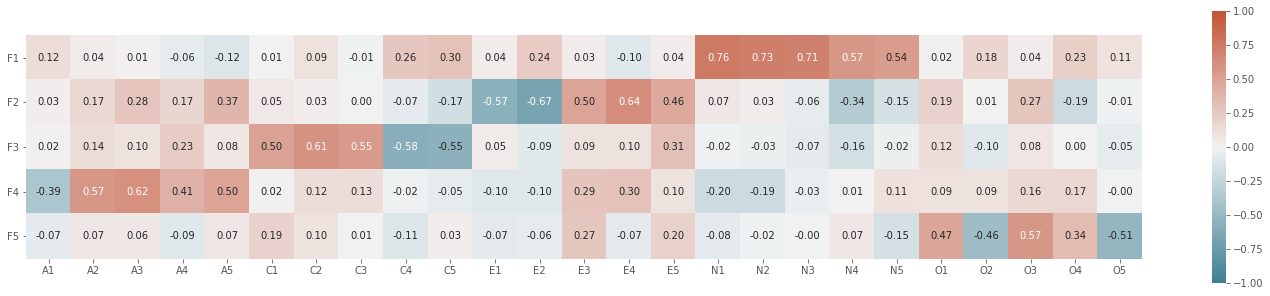

In [39]:
print('------------------------------------------------------------------------------')
print ('Gráfico para visualizar las cargas factoriales más importantes en cada factor')
print('------------------------------------------------------------------------------')
import seaborn as sns

plt.figure(figsize=(25,5))

# plot the heatmap for correlation matrix
ax = sns.heatmap(Matriz_carga_rot.drop('Mayor carga', axis=1).T, 
                vmin=-1, vmax=1, center=0,
                cmap=sns.diverging_palette(220, 20, n=200),
                square=True, annot=True, fmt='.2f')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0);

#**Un análisis de los resultados**

Los marcados en cursiva tienen cargas con signos negativos

**FACTOR 1 : Inestabilidad emocional** (tendencias hacia la ansiedad y depresión)

N1 Me enojo facilmente. 
N2 Me irriito facilmente. N3 Cambio de humor frecuentemente. 
N4 A menudo me siento deprimido. 
N5 Entro en panico fácilmente. 


**FACTOR 2: Relación con el mundo exterior** (extrovertido vs introvertido)

*E1 No hablo mucho*. *E2 Me resulta dificil acercarme a los demás*. E3 Se como cautivar a la gente. E4 Hago amigos con facilidad. E5 Me hago cargo

**FACTOR 3: Escrupulosidad** (organización, productividad, responsabilidad)

C1 Soy exigente en mi trabajo. C2 Sigo hasta que todo está perfecto. C3 Hago las cosas siguiendo un plan. C*4 Dejo las cosas a medio hacer*. *C5 Desperdicio mi tiempo*

**FACTOR 4: Amabilidad** (compasión, acatamiento, confianza en otros)

*A1 Soy indiferente a los sentimientos de los demás*. 
A2 Me intereso por el bienestar de los demás.
A3 Se cómo consolar a los demás.
A4 Amo a mis hijos.
A5 Hace que la gente se sienta a gusto.

**FACTOR 5: Apertura a experiencias** (aspectos que incluyen curiosidad intelectual e imaginación creativa)

O1 Estoy lleno de ideas.
*O2 Evito imponer mi voluntad a los demás*.
O3 Llevo la conversación a un nivel superior.
O4 Dedico tiempo a reflexionar sobre las cosas.
*O5 No profundiza sobre los temas*.


##**Cálculo de los factores**

https://stackoverflow.com/questions/31680699/how-to-calculate-factoranalysis-scores-using-python-scikit-learn

In [40]:
scores = pd.DataFrame(fa5v.fit_transform(X1),columns=['Inestabilidad','Extrovertido', 'Escrupulosidad','Amabilidad','Apertura'])
scores

,Inestabilidad,Extrovertido,Escrupulosidad,Amabilidad,Apertura
0,-0.364201,0.108035,-1.176149,-0.619665,-1.444447
1,0.127747,0.586250,-0.624554,-0.148441,-0.165469
2,0.571876,0.281250,0.015757,-0.716726,0.275861
3,-0.140807,0.026861,-1.008889,0.066408,-0.959906
4,-0.265874,0.413697,-0.036139,-0.698573,-0.603402
...,...,...,...,...,...
2795,-1.523206,0.376834,1.401176,-2.045705,1.373175
2796,-1.046023,0.099408,-1.283078,-0.109581,0.315393
2797,-0.194161,0.672468,0.801160,-0.946128,0.954651
2798,0.981927,0.746617,0.053599,-1.990420,0.761244


##**Gráfico para los dos primeros factores** 


In [41]:
print('--------------------------------------------------------')
print ('Separamos scores de los dos primeros factores estimados')
print('--------------------------------------------------------')

score=scores.iloc[:,[0,1]]

score=score.to_numpy() ## lo pasamos a formato array para usar la función definida
print(score) 
print(type(score))
score.shape

--------------------------------------------------------
Separamos scores de los dos primeros factores estimados
--------------------------------------------------------
[[-0.36420086  0.10803541]
 [ 0.12774732  0.58624955]
 [ 0.57187585  0.28124992]
 ...
 [-0.1941614   0.67246832]
 [ 0.98192736  0.74661725]
 [-1.64265366 -1.26112894]]
<class 'numpy.ndarray'>


(2800, 2)

In [42]:
print('-----------------------------------------------------------------------')
print ('Separamos las primeras dos columnas de la matriz de cargas factoriales')
print('-----------------------------------------------------------------------')
coeff=Matriz_carga_rot.iloc[:,[0,1]]
coeff=coeff.to_numpy()

print(coeff) 
print(type(coeff))
coeff.shape

-----------------------------------------------------------------------
Separamos las primeras dos columnas de la matriz de cargas factoriales
-----------------------------------------------------------------------
[[ 0.12338521  0.02661967]
 [ 0.04066624  0.16702903]
 [ 0.01407108  0.28498571]
 [-0.05814803  0.1734335 ]
 [-0.11603292  0.37203179]
 [ 0.00758025  0.05292784]
 [ 0.0909705   0.02701893]
 [-0.00796356  0.00214851]
 [ 0.26230177 -0.06777511]
 [ 0.29899584 -0.17191219]
 [ 0.04261465 -0.56558001]
 [ 0.24419345 -0.67303192]
 [ 0.03163156  0.49985727]
 [-0.10071056  0.64031554]
 [ 0.03686964  0.46474003]
 [ 0.7618989   0.0663116 ]
 [ 0.73029533  0.02889497]
 [ 0.71497945 -0.06002855]
 [ 0.57458777 -0.33503643]
 [ 0.53728109 -0.15271872]
 [ 0.02074835  0.19050546]
 [ 0.18405085  0.00596983]
 [ 0.03526472  0.26956794]
 [ 0.22638451 -0.19388444]
 [ 0.10574491 -0.00789125]]
<class 'numpy.ndarray'>


(25, 2)

**Biplot con los factores**

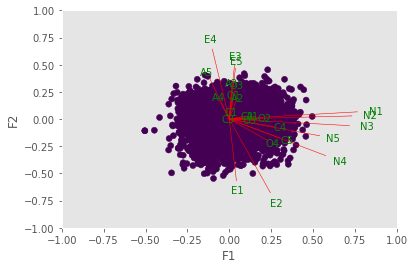

In [47]:



y= [1] * 2800 # esto se puede utilizar en el caso que hubiera grupos de pueden identificar,en este caso que no hay grupo se asigna a todos el valor 1

# se define una función para graficar
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("F{}".format(1))
    plt.ylabel("F{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.

myplot(score,coeff,labels=names_var)
plt.show()



#**Otro ejemplo para analizar**:

https://nbviewer.jupyter.org/github/hkailee/quanp/blob/master/notebooks/FactorAnalysisForCompaniesBasedOnFinancialMetricsDuringCovid19.ipynb

#**Otra función: Factanal** (desde R.....en construcción)

https://pypi.org/project/factanal/

Información de la función en R's : https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/factanal



In [44]:
import random
!pip install factanal

from factanal.wrapper import factanal

In [45]:
fa_res = factanal(X1, factors=5, scores='regression', rotation='varimax', 
                  verbose=True, return_dict=True)

Uniquenesses: 
   A1    A2    A3    A4    A5    C1    C2    C3    C4    C5    E1    E2    E3 
0.868 0.659 0.542 0.731 0.578 0.722 0.620 0.678 0.555 0.566 0.642 0.463 0.580 
   E4    E5    N1    N2    N3    N4    N5    O1    O2    O3    O4    O5 
0.484 0.636 0.329 0.374 0.495 0.536 0.658 0.705 0.743 0.554 0.766 0.741 

Loadings:
   Factor1 Factor2 Factor3 Factor4 Factor5
A1  0.115                  -0.340         
A2          0.139   0.140   0.543         
A3          0.239           0.621         
A4          0.141   0.228   0.433         
A5 -0.115   0.325           0.540         
C1                  0.484           0.200 
C2                  0.580   0.151   0.122 
C3                  0.549   0.143         
C4  0.240          -0.609                 
C5  0.278  -0.186  -0.564                 
E1         -0.577          -0.124         
E2  0.227  -0.671          -0.146         
E3          0.440           0.361   0.300 
E4 -0.102   0.600           0.371         
E5          0.446   0.309


#**Métodos de estimación** (Adicional)

**Componentes principales**

Utiliza la normalización $\bf{\Lambda\Lambda^{'} = D}$ (diagonal) 

Los vectores de la matriz de carga son ortogonales, incorrelados. La matriz de carga es única. Un rotación define otra matriz  no diagonal.

La matriz $S$ puede reconstruirse a partir de sus valores y vectores propios (descomposición espectral)

Para $m<p$
$ \Lambda  = (\sqrt {{{\hat \lambda }_1}} ,{\hat u_1}),(\sqrt {{{\hat \lambda }_2}} ,{\hat u_2})....(\sqrt {{{\hat \lambda }_m}} ,{\hat u_m})$

${\bf{S}} - \hat \Lambda \hat \Lambda  = \hat \psi$


**Método del factor principal**

${\bf{S}} - \hat \Psi=\hat \Lambda \hat \Lambda$  matriz simétrica (no siempre definida positiva)
Estimación inicial  de $\hat \Lambda$ o $\Psi$}
Equivale definir valores de $h_i^2 = s_i^2 - \hat \psi _{ii}^2$
$\hat{\psi} _{ii} = 0$
$\hat{\psi} _{ii} = \frac{1}{s_{ii}^{*}}\qquad$ $s_{ii}^{*}$ es el elemento diagonal de ${\bf{S}}^{-1}$

Descomposición espectral de $\bf{S} - {\Psi}$

${\bf{S}} - \Psi  = {H_1}{G_1}H_1^{'} + {H_2}{G_2}H_2^{'}$

por sus valores propios $G$ y vectores propios $H$. $G_1$ contiene los $m$ mayores valores propios y $H_1$ sus vectores propios.

La estimación de los  coeficientes de carga será igual a:
$\hat \Lambda  = {H_1}G_1^{1/2}$ Vuelve al paso 1 hasta $\left| {\hat
{ \Lambda }_{n + 1}} - {\hat {\Lambda }_n} \right\| < \varepsilon $.              
Se obtienen estimadores consistentes, no eficientes, no son invariantes a transformaciones lineales.

**Métodos de estimación : Estimación Máximo verosímil**

Supone observaciones con distribución  $N_p(\mu,\bf{V})$ la función soporte para $\bf{V}$ es:

$\log ({\bf{V}}/{\bf{X}}) =  - \frac{n}{2}\log \left| {\bf{V}} \right| - \frac{n}{2}tr({\bf{S}}{{\bf{V}}^{ - 1}})$

sustituyendo $\bf{V}$
$L(\Lambda ,\psi ) =  - \frac{n}{2}\log \left| {\Lambda \Lambda ^{'} + \psi } \right| - \frac{n}{2}tr({\bf{S}}(\Lambda \Lambda ^{'} + \psi )^{ - 1})$

Los estimadores máximos verosímiles se obtienen maximizando respecto de $\Lambda $ y $\Psi$.

Derivando respecto de $\Lambda $ y $\Psi$. se obtiene tres ecuaciones:
$\hat \psi  = diag({\bf{S}} - \Lambda \Lambda^{'})$
$\left( {{{\hat \psi }^{ - 1/2}}({\bf{S}} - {\bf{I}}){{\hat \psi }^{ - 1/2}}} \right)\left( {{{\hat \psi }^{ - 1/2}}\hat \Lambda } \right) = \left( {{{\hat \psi }^{ - 1/2}}\hat \Lambda } \right){\bf{D}}$
donde 
${\bf{D}} = {\hat \Lambda }^{'}{{\hat \psi }^{- 1}}\hat \Lambda $ es el resultado de la normalización
 donde los vectores de la matriz de carga ponderados por las varianzas de las perturbaciones en cada ecuación, se hacen incorrelados. La matriz de carga es única, una rotación define otra matriz
 



**Estimación de los factores**

**Estimación de los factores: como parámetros**

Bartlett, supone que el vector de valores de los factores para cada
observación es un parámetro a estimar

${{\bf{x}}_i} = \Lambda {{\bf{f}}_i} + {{\bf{u}}_i}$

${{\bf{x}}_i}\sim{N_p}(\Lambda {{\bf{f}}_i},\psi )$

${{\bf{u}}_i}\sim N(\Lambda {{\bf{f}}_i},\psi )$


Los parámetros $\bf{f}_i$ pueden estimarse por máxima verosimilitud, 
siendo el estimador por mínimos cuadrados generalizados:
$\bf{\hat{f}}_i ={ \left( \hat{\Lambda}^{'} \hat{\psi}^{-1} \hat{\Lambda}\right)}^{-1}{\hat \Lambda^{'}\hat{\psi}^{-1}\bf{x}_i}$

**Estimación de los factores: como variables aleatorias**

Supone que los factores son variables aleatorias El vector ($\bf{f}_i$ ,$\bf{x}_i$) tendrá distribución normal multivariada.

Busca un predictor que minimice el error cuadrático medio de predicción

$\bf{\hat{f}}_{i} = E({\bf{f}}_{i}/{\bf{x}}_{i}) = \Lambda ^{'}{{\bf{V}}^{-1}}{\bf{x}}_{i}$

$\bf{\hat{f}}_{i} = {\left( {{\bf{I}} + \hat \Lambda^{'}\hat{\psi}^{-1}}\hat{\Lambda } \right)^{-1}}\hat \Lambda ^{'}\hat{\psi}^{ - 1}{\bf{x}}_{i}$
